In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import matplotlib as plt
import numpy as np

# Enable inline plotting
%matplotlib inline

Сгенерировать датасет

In [59]:
def create_dataset(number_for_date=1):
    result = []
    country_codes = ['RU', 'Ru', 'US', 'us', 'KZ', 'IT', 'it', 'CA', 'Ca']
    status = [1, 2, 3]
    for i in range(number_for_date):
        dates_rng = pd.date_range(start='2023-01-01', end='2024-04-05', freq='D')
        rand_customer_count = np.random.randint(0,1200,len(dates_rng))
        rand_status = [status[np.random.randint(0,len(status))] for i in range(len(dates_rng))]
        rand_country_code = [country_codes[np.random.randint(0,len(country_codes))] for i in range(len(dates_rng))]
        result += list(zip(dates_rng, rand_customer_count, rand_country_code, rand_status))
        ## либо
        #result.extend(zip(dates_rng, rand_customer_count, rand_country_code, rand_status))
    return result


Создание датафрейма на основе сгенерированного датасета

In [60]:
dataset = create_dataset(4)
df = pd.DataFrame(data=dataset, columns=['date_in', 'customer_count', 'country_code', 'status'])
df

,date_in,customer_count,country_code,status
0,2023-01-01,240,RU,3
1,2023-01-02,160,us,3
2,2023-01-03,1110,Ru,2
3,2023-01-04,852,RU,3
4,2023-01-05,917,KZ,2
...,...,...,...,...
1839,2024-04-01,635,RU,2
1840,2024-04-02,715,US,3
1841,2024-04-03,15,it,3
1842,2024-04-04,265,IT,2


Конвертировать в excel. Отличие от csv - наличие страниц

In [61]:
df.to_excel('company_stats.xlsx', index=False)

из excel в датафрейм

In [62]:
#второй аргумент 0 - потому что при сохранении в xlsx не указывалось название листа
df = pd.read_excel('company_stats.xlsx', 0, index_col='date_in')
df

,customer_count,country_code,status
date_in,,,
2023-01-01,240,RU,3
2023-01-02,160,us,3
2023-01-03,1110,Ru,2
2023-01-04,852,RU,3
2023-01-05,917,KZ,2
...,...,...,...
2024-04-01,635,RU,2
2024-04-02,715,US,3
2024-04-03,15,it,3


Получить индексы

In [63]:
df.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2024-03-27', '2024-03-28', '2024-03-29', '2024-03-30',
               '2024-03-31', '2024-04-01', '2024-04-02', '2024-04-03',
               '2024-04-04', '2024-04-05'],
              dtype='datetime64[ns]', name='date_in', length=1844, freq=None)

Информация о типах данных в колонках

In [64]:
df.dtypes

customer_count     int64
country_code      object
status             int64
dtype: object

В колонке country_code поменять все на капс

In [65]:
df['country_code'] = df['country_code'].apply(lambda x: x.upper())
df

,customer_count,country_code,status
date_in,,,
2023-01-01,240,RU,3
2023-01-02,160,US,3
2023-01-03,1110,RU,2
2023-01-04,852,RU,3
2023-01-05,917,KZ,2
...,...,...,...
2024-04-01,635,RU,2
2024-04-02,715,US,3
2024-04-03,15,IT,3


Отфильтровать по значению RU

In [66]:
df[df['country_code'] == 'RU']


,customer_count,country_code,status
date_in,,,
2023-01-01,240,RU,3
2023-01-03,1110,RU,2
2023-01-04,852,RU,3
2023-01-13,767,RU,2
2023-01-15,971,RU,1
...,...,...,...
2024-03-17,688,RU,2
2024-03-26,525,RU,3
2024-03-31,837,RU,3


Заменить RU на IT в country_code

In [67]:
df['country_code'].replace(to_replace='RU', value='IT')

date_in
2023-01-01    IT
2023-01-02    US
2023-01-03    IT
2023-01-04    IT
2023-01-05    KZ
              ..
2024-04-01    IT
2024-04-02    US
2024-04-03    IT
2024-04-04    IT
2024-04-05    IT
Name: country_code, Length: 1844, dtype: object

Какие country_code имеются в датафрейме?

In [68]:
df['country_code'].unique()
#или
df['country_code'].value_counts()

country_code
US    431
CA    421
IT    416
RU    380
KZ    196
Name: count, dtype: int64

График количества клиентов по датам

<Axes: xlabel='date_in'>

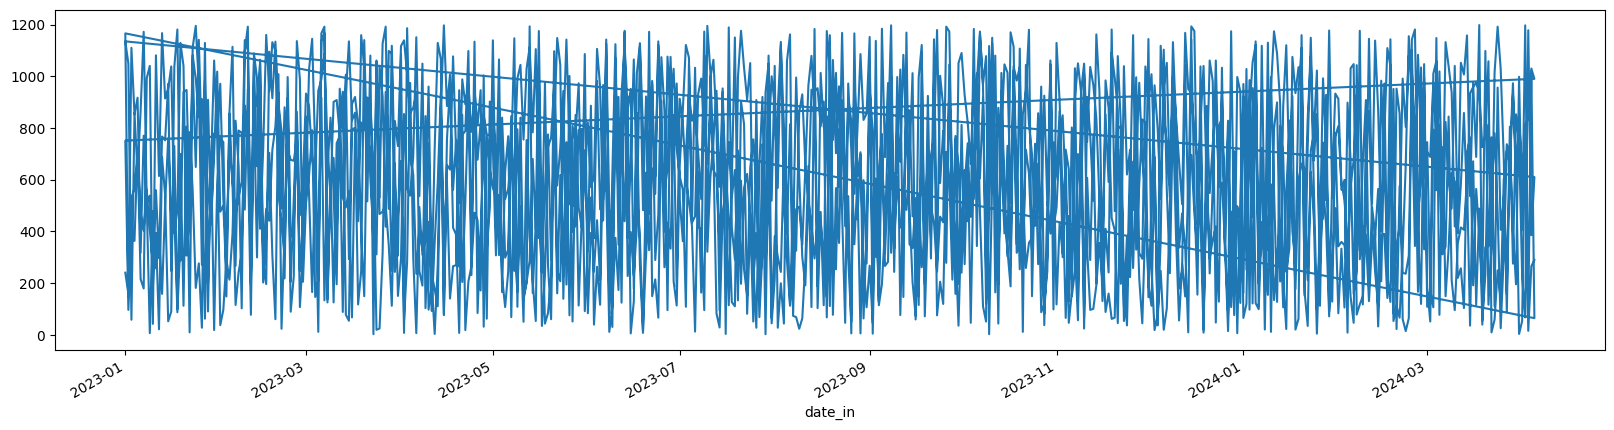

In [69]:
df['customer_count'].plot(figsize=(20,5))

Отобразить количество пользователей по странам

In [71]:
daily_data = df.reset_index().groupby(['country_code', 'date_in']).sum()
daily_data

customer_count  status
country_code date_in                           
CA           2023-01-01            2301       5
             2023-01-02              96       1
             2023-01-04             858       3
             2023-01-06             317       3
             2023-01-09             538       2
...                                 ...     ...
US           2024-03-31               3       3
             2024-04-01              53       2
             2024-04-02            1912       6
             2024-04-03             840       1
             2024-04-04            2049       3

[1332 rows x 2 columns]